데이터 읽고 산포도 그리기
https://seo00.tistory.com/60

titanic 생존자 예측

1. 데이터 확인
2. 목표 확인 - Survived 예측
3. 결측치 확인 및 처리
4. EDA (시각화 포함한 탐색적 분석)
5. 컬럼별 분석 + 이상치 탐색
6. 데이터 라벨링 및 불리언화
7. 필요없는 컬럼 제거
8. Feature Engineering (파생변수 생성)
9. Feature Importance / 상관 분석
10. 검증 전략 설정 (KFold 등)
11. 모델 선택 및 학습                -- 여기가 대부분의 모델 안에 수정 XGBR, Github
    8~11 반복하면서 모델 선정
12. 하이퍼파라미터 튜닝
13. 최종 모델 선정 및 검증
14. 결과 예측(=추론) 및 저장
15. 평가 지표 확인 및 대회 제출
--

1. Read data
2. check goal -> predict survived

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

train.head()
#test.head()
#gender_submission.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train.csv 데이터 자료

컬럼            이름	        의미	                        첫 번째 행 데이터
PassengerId	    승객            ID 번호	                        1
Survived	    생존            여부 (0 = 사망, 1 = 생존)	    0 (사망)
Pclass	        선실            등급 (1등석, 2등석, 3등석)	    3
Name	        승객            이름	                        Braund, Mr. Owen Harris
Sex	            성별            (male = 남성, female = 여성)	male (남성)
Age	            나이	                                        22.0세
SibSp	        함께            탑승한 형제자매/배우자 수	       1명
Parch	        함께            탑승한 부모/자녀 수	              0명
Ticket	        티켓            번호	                        A/5 21171
Fare	        요금	                                        7.25
Cabin	        선실 번호       (정보 없을 수도 있음)	        없음
Embarked	    탑승한 항구     (S = 사우샘프턴 등)	            S (사우샘프턴)

3. missingno check

,ms_cnt,ms_ratio
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


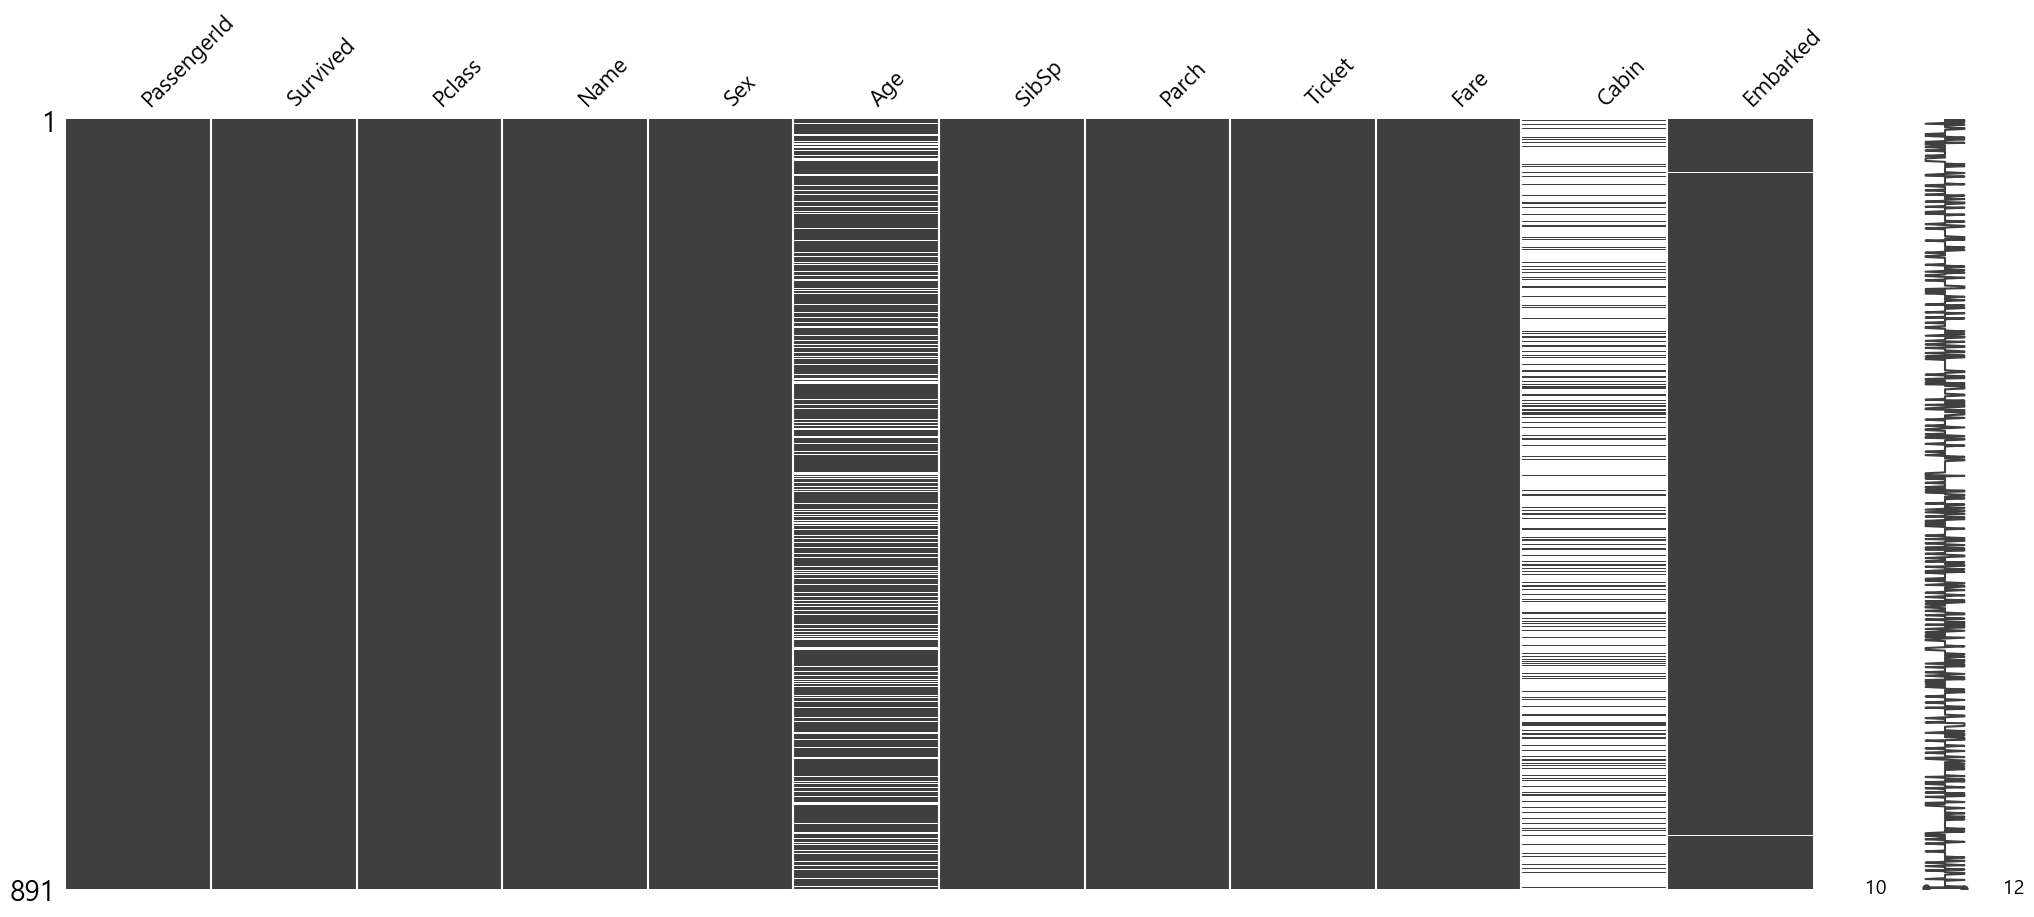

In [9]:
import missingno as msno
msno.matrix(train) 
ms_cnt = train.isnull().sum()

ms_info = pd.DataFrame({
    "ms_cnt" : ms_cnt,
    "ms_ratio" : ms_cnt / len(train)
}).sort_values(by="ms_cnt",ascending = False)
ms_info

결측치 분석결과 Emarked, Age, Cabin 순으로 결측치가 존재
결측치를 어떻게 처리할까?
    -